<a href="https://colab.research.google.com/github/aditikamble123/Data-Analysis-Internship/blob/main/cognifyz(level3_task1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Dataset .csv')

print(data.head())
print(data.describe())
print(data.info())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [35]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
# Download the missing 'punkt_tab' data package
nltk.download('punkt_tab') # This line is added to download the required data package
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
  text = text.lower()
  tokens = word_tokenize(text)
  tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
  return ' '.join(tokens)

df['processed_review'] = df['Review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [36]:
# prompt: Find Most Common Positive & Negative Words

from collections import Counter

positive_words = []
negative_words = []

# Assuming 'processed_review' column contains the preprocessed text.
for review in df['processed_review']:
    words = review.split()
    for word in words:
        # You can define your own positive/negative word lists or use sentiment lexicons.
        if word in ['good', 'great', 'excellent', 'love', 'amazing','very excellent']:
            positive_words.append(word)
        elif word in ['bad', 'terrible', 'awful', 'hate', 'poor']:
            negative_words.append(word)


positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)


most_common_positive = positive_word_counts.most_common(5)  # Get top 5
most_common_negative = negative_word_counts.most_common(5)

print("Most common positive words:", most_common_positive)
print("Most common negative words:", most_common_negative)


Most common positive words: [('good', 3179), ('excellent', 301)]
Most common negative words: [('poor', 186)]


In [37]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Review', 'Votes',
       'processed_review'],
      dtype='object')


Correlation between review length and rating color: -0.25601042595733553


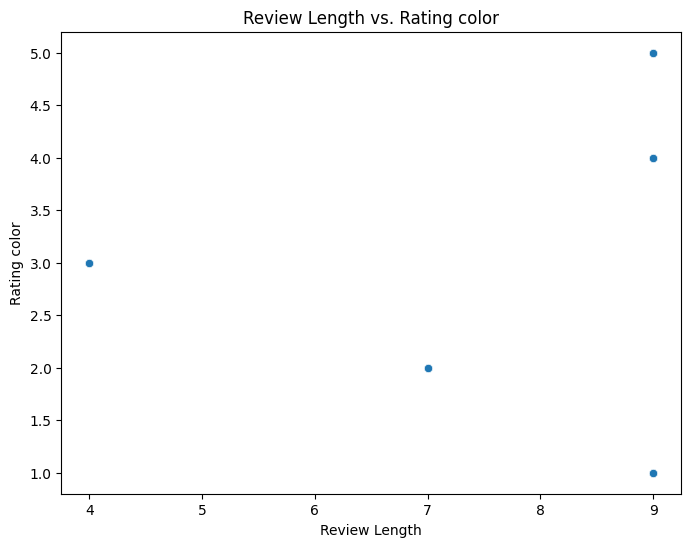

review_length_category
Short        2.32173
Medium           NaN
Long             NaN
Very Long        NaN
Name: numerical_rating, dtype: float64


<ipython-input-38-15a4edb00403>:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings_by_length = df.groupby('review_length_category')['numerical_rating'].mean()


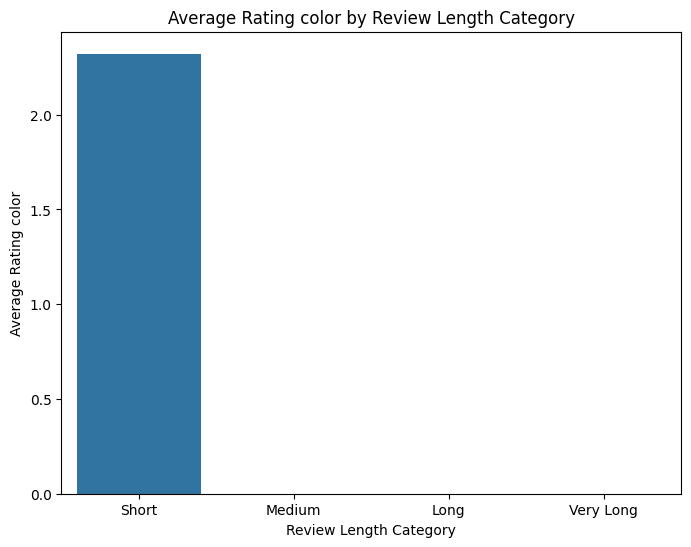

In [38]:
# Analyze review length and rating correlation
df['review_length'] = df['Review'].apply(len)

# Define the mapping between Rating color and numerical values
rating_mapping = {
    'Dark Green': 5,  # Excellent
    'Green': 4,       # Very Good
    'Orange': 2,      # Average
    'Yellow': 3,      # Good
    'White' : 1      #Poor
    # Add more mappings if needed
}

# Apply the mapping to create the numerical_rating column
df['numerical_rating'] = df['Rating color'].map(rating_mapping)

# Create a new column with numerical ratings
df['numerical_rating'] = df['Rating color'].map(rating_mapping)

# Calculate the correlation between review length and numerical rating
correlation = df['review_length'].corr(df['numerical_rating'])

print(f"Correlation between review length and rating color: {correlation}")

# Visualize the relationship between review length and rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='review_length', y='numerical_rating', data=df)  # Use 'numerical_rating' for y-axis
plt.title('Review Length vs. Rating color')
plt.xlabel('Review Length')
plt.ylabel('Rating color')
plt.show()

# Further analyze the relationship by grouping reviews into length categories
# and comparing average ratings within each category.
bins = [0, 50, 100, 200, float('inf')]  # Define bins for review length categories
labels = ['Short', 'Medium', 'Long', 'Very Long']
df['review_length_category'] = pd.cut(df['review_length'], bins=bins, labels=labels)

# Use the 'numerical_rating' column for calculating the mean
average_ratings_by_length = df.groupby('review_length_category')['numerical_rating'].mean()
print(average_ratings_by_length)

# Visualize this using a bar plot:
plt.figure(figsize=(8, 6))
sns.barplot(x=average_ratings_by_length.index, y=average_ratings_by_length.values)
plt.title('Average Rating color by Review Length Category')
plt.xlabel('Review Length Category')
plt.ylabel('Average Rating color')
plt.show()